In [1]:
# import neccessary library
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import joblib

In [2]:
df=pd.read_csv('master_daily_export2_drop_last.csv', parse_dates=['date'],encoding = 'unicode_escape').iloc[::-1]
df.dropna(inplace=False)
# have a quick glance at the data
df.head(2)


,date,bookings,bagdays,commission
767,2018-01-01,83.0,216.0,556.0
766,2018-01-02,117.0,287.0,738.0


In [3]:
df.date.describe()

count                     768
unique                    768
top       2019-10-25 00:00:00
freq                        1
first     2018-01-01 00:00:00
last      2020-02-07 00:00:00
Name: date, dtype: object

As we can see, there are just under 800 observations. First, we would like to have a look at the autocorrelation plot. First glance suggests that there is a strong correlation in the data. 

Also, you might notice that more points are negatively covarying than points that are positivel covarying. But it can also be noticed that the positively covarying points are og greater magnitude, while the negatively covarying points have a smaller magnitude of the autocovariance, since they are closer to the confidence interval bands (on the graph the dashed gray lines). This suggest that the autocovariance function can be approximated to zero, however, more insight can be gained while modeling.

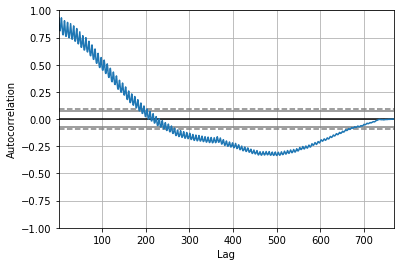

In [4]:
#autocorrelation plot
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('master_daily_export2_drop_last.csv', header=0, parse_dates=['date'], index_col=0,encoding = 'unicode_escape', squeeze=True).iloc[::-1]
series.head()
series=series.drop(["commission", "bagdays"], axis=1)
autocorrelation_plot(series)
pyplot.show()

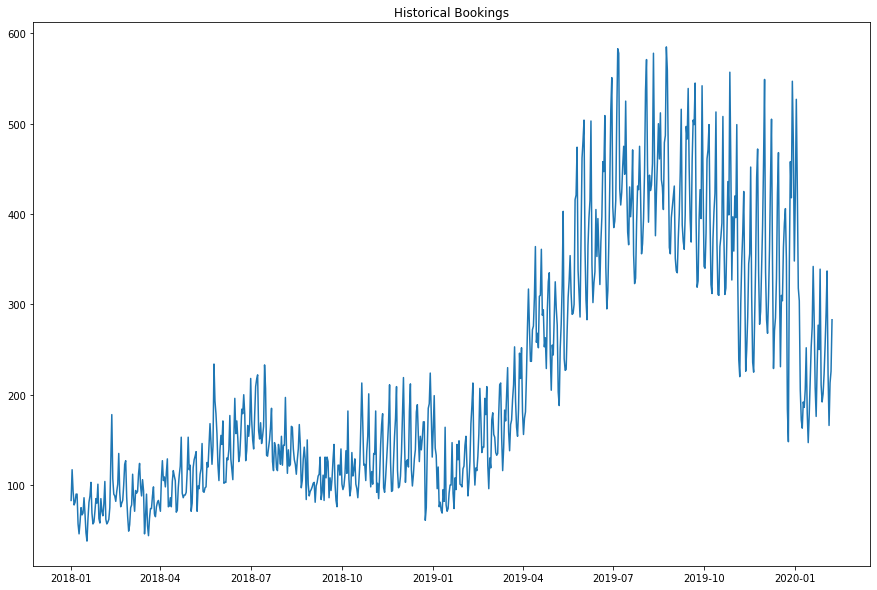

In [94]:
plt.figure(figsize=(15,10))
plt.plot(df.bookings)
plt.title('Historical Bookings')
plt.show()

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.bookings   No. Observations:                  767
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -3793.945
Method:                       css-mle   S.D. of innovations             33.954
Date:                Tue, 18 Feb 2020   AIC                           7605.890
Time:                        15:27:32   BIC                           7647.672
Sample:                    01-02-2018   HQIC                          7621.973
                         - 02-07-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2108      0.520      0.405      0.685      -0.809       1.231
ar.L1.D.bookings    -0.2927      0.033     -8.851      0.000      -0.358      -0.228
ar.L2.D.bookings    -0.3202 

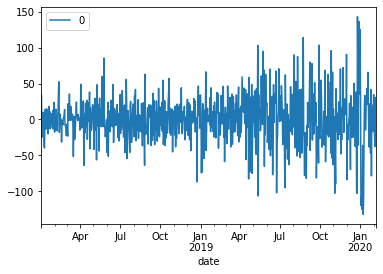

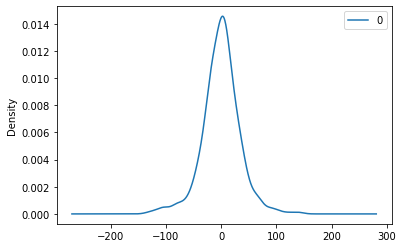

                0
count  767.000000
mean     0.032793
std     34.000200
min   -132.237701
25%    -17.868508
50%      1.394422
75%     18.392368
max    143.219973


In [5]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.bookings   No. Observations:                  767
Model:                 ARIMA(7, 1, 3)   Log Likelihood               -3783.260
Method:                       css-mle   S.D. of innovations             33.467
Date:                Tue, 18 Feb 2020   AIC                           7590.520
Time:                        15:27:36   BIC                           7646.229
Sample:                    01-02-2018   HQIC                          7611.963
                         - 02-07-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2020      0.668      0.302      0.762      -1.108       1.512
ar.L1.D.bookings    -0.0220      0.061     -0.359      0.719      -0.142       0.098
ar.L2.D.bookings    -0.2179 

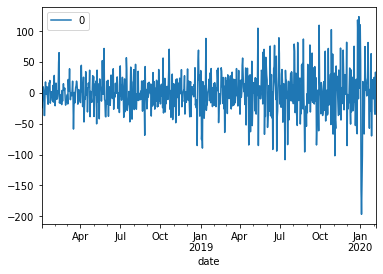

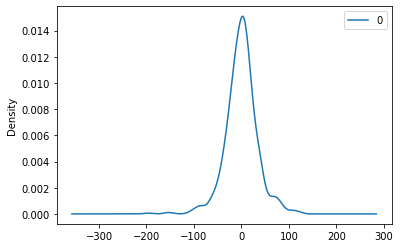

                0
count  767.000000
mean     0.050130
std     33.519756
min   -196.761444
25%    -17.372654
50%      0.951868
75%     16.774047
max    123.601158


In [6]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(7,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

As we can see from the residuals graph, it is mainly fluctuating around 0. In the last graph we can see that the mean is again 0, hinting that the result might be unbiased. When including MA terms too, we can see that AIC have declined (which is a good sign), however, there is not a significant improvement in the prediction power yet.

predicted=270.455990, expected=290.000000
predicted=298.740317, expected=300.000000
predicted=316.455366, expected=416.000000
predicted=385.100331, expected=421.000000
predicted=388.564642, expected=474.000000
predicted=389.303308, expected=338.000000
predicted=312.699383, expected=313.000000
predicted=304.869536, expected=286.000000
predicted=322.740025, expected=374.000000
predicted=420.893192, expected=462.000000
predicted=458.173570, expected=481.000000
predicted=460.198504, expected=504.000000
predicted=394.102349, expected=361.000000
predicted=329.819032, expected=305.000000
predicted=306.388192, expected=283.000000
predicted=366.602460, expected=365.000000
predicted=438.846863, expected=396.000000
predicted=446.857451, expected=415.000000
predicted=429.564484, expected=503.000000
predicted=399.498676, expected=344.000000
predicted=313.828390, expected=302.000000
predicted=298.473162, expected=324.000000
predicted=371.669930, expected=336.000000
predicted=381.365849, expected=405

predicted=291.604085, expected=268.000000
predicted=324.601515, expected=309.000000
predicted=372.305643, expected=362.000000
predicted=441.173873, expected=439.000000
predicted=488.216867, expected=505.000000
predicted=359.479145, expected=347.000000
predicted=298.528649, expected=229.000000
predicted=239.298565, expected=271.000000
predicted=311.804366, expected=285.000000
predicted=351.281301, expected=329.000000
predicted=410.969510, expected=423.000000
predicted=461.282176, expected=468.000000
predicted=351.821731, expected=326.000000
predicted=248.228094, expected=231.000000
predicted=259.091737, expected=310.000000
predicted=314.461610, expected=304.000000
predicted=346.040693, expected=363.000000
predicted=426.656648, expected=390.000000
predicted=420.942716, expected=406.000000
predicted=312.829338, expected=349.466667
predicted=277.963206, expected=184.000000
predicted=259.669417, expected=148.000000
predicted=218.271693, expected=347.000000
predicted=387.887856, expected=458

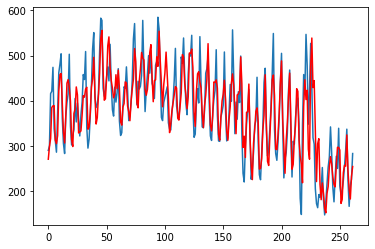

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

As we can see from the graph above, blue is rolling forecast, red is predicted. The direction of the move is predicted quite nicely, however, at times the magnitude of the change is underestimated. This comes from the fact that only the variable itself is used for prediction purposes. 

In [8]:
from pmdarima.arima.utils import ndiffs
y = series[series.columns[0]]

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

The result suggests no difference, let's try to conduct ADF test to check that formally.

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.195066
p-value: 0.675715
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


The result indicates that the data does contain unit root, meaning, it is not stationary. Hence, we will need to implement differencing.

In [10]:
from statsmodels.tsa.stattools import adfuller
y_diff=y.diff()
y_diff.dropna(inplace=True)
result = adfuller(y_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.192837
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


As, we can see just the first difference makes it already stationary. Thus, we will use difference order of 1.

In [11]:
df.head()

,date,bookings,bagdays,commission
767,2018-01-01,83.0,216.0,556.0
766,2018-01-02,117.0,287.0,738.0
765,2018-01-03,93.0,178.0,464.0
764,2018-01-04,78.0,171.0,446.0
763,2018-01-05,81.0,184.0,441.0


From the results, however, we see that the series is not stationary, thus differencing is neccessary.

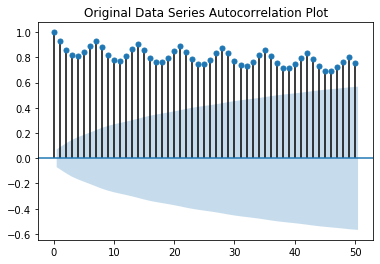

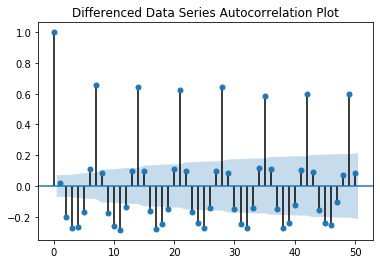

In [12]:
# The first plot refers to the original series
plot_acf(df['bookings'],lags=50, title="Original Data Series Autocorrelation Plot")
# The second plot refers to already differenced series
plot_acf(df['bookings'].diff().dropna(),lags=50, title="Differenced Data Series Autocorrelation Plot")
plt.show()

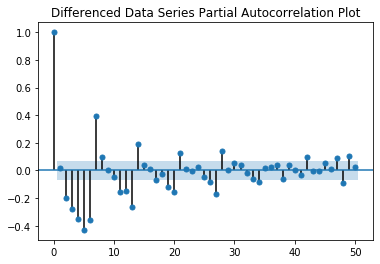

In [13]:
plot_pacf(df['bookings'].diff().dropna(),lags=50, title="Differenced Data Series Partial Autocorrelation Plot")
plt.show()

In [14]:
#thus, we have to fit model with AR(7). however, let's check with auto-arima

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.bookings   No. Observations:                  767
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -3793.945
Method:                       css-mle   S.D. of innovations             33.954
Date:                Tue, 18 Feb 2020   AIC                           7605.890
Time:                        15:30:51   BIC                           7647.672
Sample:                    01-02-2018   HQIC                          7621.973
                         - 02-07-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2108      0.520      0.405      0.685      -0.809       1.231
ar.L1.D.bookings    -0.2927      0.033     -8.851      0.000      -0.358      -0.228
ar.L2.D.bookings    -0.3202 

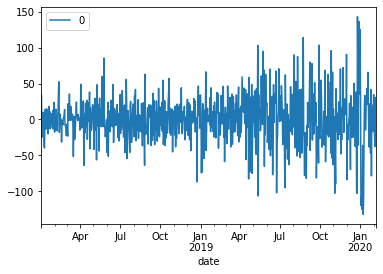

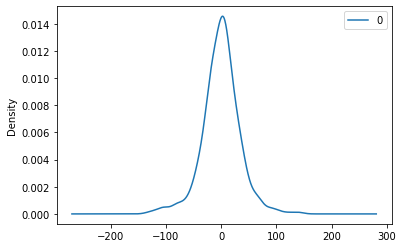

                0
count  767.000000
mean     0.032793
std     34.000200
min   -132.237701
25%    -17.868508
50%      1.394422
75%     18.392368
max    143.219973


In [15]:
#hence, the ARIMA model will be the following
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [16]:
# now, let's compute with autoarima.
import pmdarima as pm
model = pm.auto_arima(df.bookings, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=8168.538, BIC=8187.108, Fit time=0.263 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=8173.353, BIC=8182.638, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=8175.147, BIC=8189.075, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=8175.015, BIC=8188.943, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=8171.375, BIC=8176.017, Fit time=0.011 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=7958.446, BIC=7981.659, Fit time=0.344 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=8145.220, BIC=8163.790, Fit time=0.064 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=7921.663, BIC=7949.518, Fit time=0.421 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=8086.615, BIC=8109.827, Fit time=0.088 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_o

In [17]:
# The result indicated ARMA(4,1,5), however, with ARIMA (7,1,0) we get only a little higher AIC&BIC.

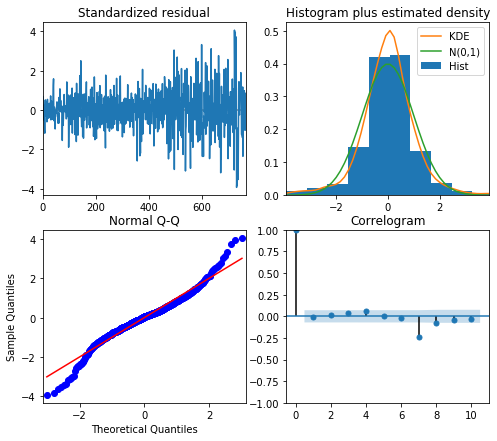

In [18]:
model.plot_diagnostics(figsize=(8,7))
plt.show()

Standardized residual graph:
The residual errors seem to fluctuate around a mean of zero and have a somewhat uniform variance.

Histogram plus estimated density:
The density plot is somewhat normally distributed.

Normal Q-Q.
All the dots should fall  in line with the red line. As it can be noted, this is not the case for our model, thus these significant deviations imply the distribution is skewed.

Correlogram: 
The ACF plot shows the residual errors are not autocorrelated. Only the seventh  one is a little outside the confidence band. Any significant autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model.

In [19]:
len(df.bookings)

768

In [20]:
len(df.bookings)
train = df.bookings[:-90]
test = df.bookings[-90:]

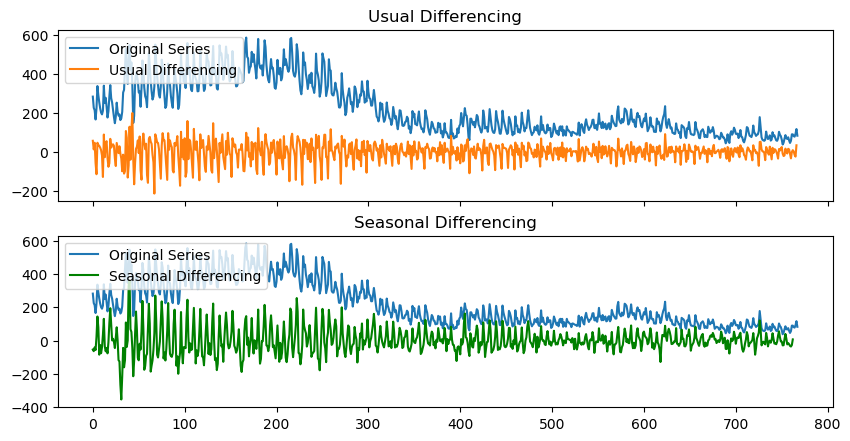

In [21]:
# build an SARIMA
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.bookings[:], label='Original Series')
axes[0].plot(df.bookings[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df.bookings[:], label='Original Series')
axes[1].plot(df.bookings[:].diff(5), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [22]:
# Seasonal - fit stepwise auto-ARIMA
# with this we would like to introduce seasonality.
smodel = pm.auto_arima(df.bookings, start_p=1, start_q=1,
                         test='adf',
                         max_p=7, max_q=7, m=7,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7316.047, BIC=7339.214, Fit time=1.882 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7809.303, BIC=7818.570, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7562.363, BIC=7580.896, Fit time=0.399 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7355.412, BIC=7373.945, Fit time=0.645 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7807.305, BIC=7811.939, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7667.684, BIC=7686.217, Fit time=0.832 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7316.313, BIC=7344.113, Fit time=2.555 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7316.357, BIC=7344.157, Fit time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  768
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3649.783
Date:                           Tue, 18 Feb 2020   AIC                           7313.567
Time:                                   15:32:18   BIC                           7346.000
Sample:                                        0   HQIC                          7326.056
                                           - 768                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0046      0.008     -0.600      0.548      -0.020       0.010
ar.L1          0.6185      0.029     21.568      0.000       0.562       0.675
ar.L2          0.0310      0.030      1.020      0.308      -0.029       0.091
ar.L3          0.0708      0.027      2.606      0.009       0.018       0.124
ma.L1         -0.9537      0.019    -51.550      0.000      -0.990      -0.917
ma.S.L7       -0.8551      0.020    -43.716      0.000      -0.893      -0.817
sigma2       855.3955     32.947     25.962      0.000     790.820     919.971
===================================================================================
Ljung-Box (Q):                       43.70   Jarque-Bera (JB):               184.03
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#which gives lower AIC, therefore it is a better fit, thus seasonality does play a considerable role here.

In [24]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.bookings,
                                order=(3, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

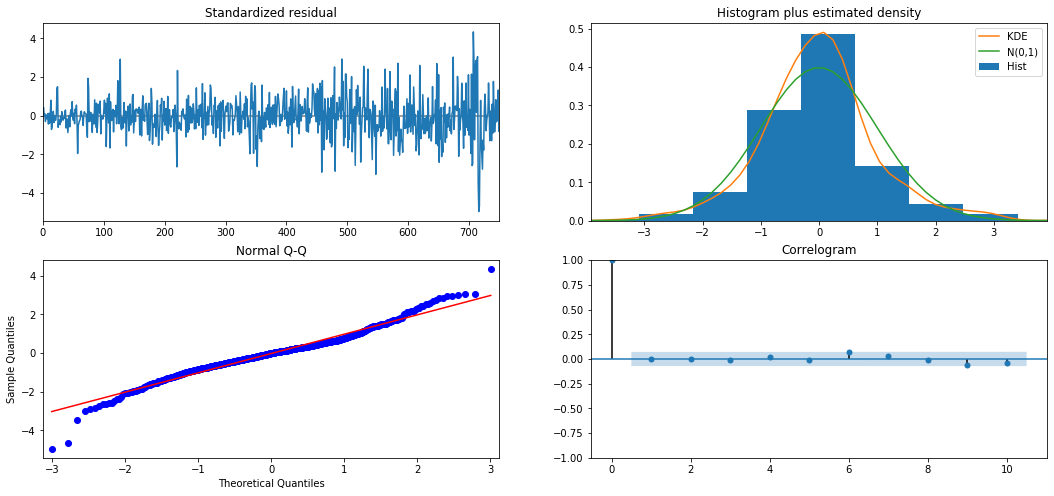

In [25]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

AS we could see from this analysis, introducing seasonality did improve the model significantly, which was excepted, as in the graphs we saw clear patterns. In case independent variables are included, the model does have a potential to have a better predicting power. 

# Prediction visualization

## ARIMA

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


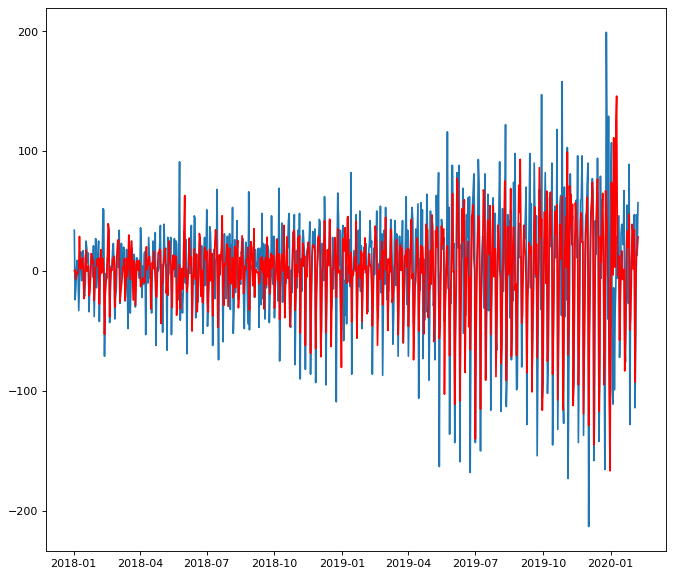

In [26]:
# ARIMA prediction vs actual values plot
df=pd.read_csv('master_daily_export2_drop_last.csv', parse_dates=['date'],encoding = 'unicode_escape')
df.set_index('date', inplace=True)
df = df.sort_index()
df.tail()
df.dropna(inplace=False)
df_shift = df.bookings - df.bookings.shift()
df_shift.dropna(inplace=True)
model = ARIMA(df.bookings, order=(7,1,0))
results = model.fit(disp=-1)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

You can see that the pattern is quite followed, the magnitude prediction, however, is not quite precise. 

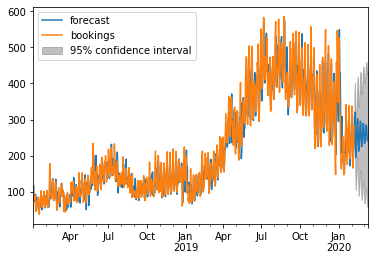

In [27]:
results.plot_predict(1,800)
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
plt.show()

You can see that it replicates the the fluctiations, however, then the magnitude of fluctuations decrease, and it seems to revert to the mean. We have seen previously that test MSE for this model was **2282.932**.

## SARIMA

In [28]:
import pmdarima as pm


smodel = pm.auto_arima(df.bookings, start_p=1, start_q=1,
                         test='adf',
                         max_p=7, max_q=7, m=7,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7316.047, BIC=7339.214, Fit time=1.854 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7809.303, BIC=7818.570, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7562.363, BIC=7580.896, Fit time=0.397 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7355.412, BIC=7373.945, Fit time=0.649 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7807.305, BIC=7811.939, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7667.684, BIC=7686.217, Fit time=0.829 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7316.313, BIC=7344.113, Fit time=2.554 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7316.357, BIC=7344.157, Fit time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  768
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3649.783
Date:                           Tue, 18 Feb 2020   AIC                           7313.567
Time:                                   15:33:34   BIC                           7346.000
Sample:                                        0   HQIC                          7326.056
                                           - 768                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0046      0.008     -0.600      0.548      -0.020       0.010
ar.L1          0.6185      0.029     21.568      0.000       0.562       0.675
ar.L2          0.0310      0.030      1.020      0.308      -0.029       0.091
ar.L3          0.0708      0.027      2.606      0.009       0.018       0.124
ma.L1         -0.9537      0.019    -51.550      0.000      -0.990      -0.917
ma.S.L7       -0.8551      0.020    -43.716      0.000      -0.893      -0.817
sigma2       855.3955     32.947     25.962      0.000     790.820     919.971
===================================================================================
Ljung-Box (Q):                       43.70   Jarque-Bera (JB):               184.03
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

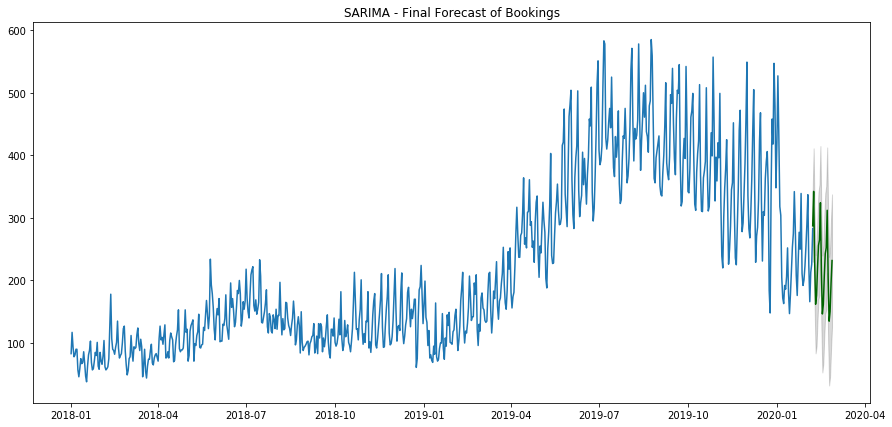

In [29]:
# Forecast
n_periods = 21 #forecast for the coming 21 days/3 weeks
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.bookings.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.bookings)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Bookings")
plt.show()

You can clearly see that this model have performed better, as the fluctuations do not quickly revert to mean, and the opposite, they do replicate the pattern quite well. 

In [30]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.bookings,
                                order=(3, 1, 1),
                                seasonal_order= (0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [31]:
import numpy as np
y_forecasted = pred.predicted_mean
mse = ((y_forecasted - df.bookings) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 874.55
The Root Mean Squared Error is 29.57


You can see how significantly lower is the MSE for the SARIMA model ( **874.55** ). It has decreased significantly compared to ARIMA MSE, indicating a better fit for the data we have. Improvement is evident not only for MSE indicator, but for AIC&BIC. They are considerably lower for SARIMA model. 

# Forecast SARIMA

In [32]:
df.bookings

date
2018-01-01     83.0
2018-01-02    117.0
2018-01-03     93.0
2018-01-04     78.0
2018-01-05     81.0
              ...  
2020-02-03    223.0
2020-02-04    166.0
2020-02-05    213.0
2020-02-06    226.0
2020-02-07    283.0
Name: bookings, Length: 768, dtype: float64

In [98]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.bookings,
                                order=(3, 1, 1),
                                seasonal_order= (0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.get_prediction(start=pd.to_datetime('2020-02-08'), end=pd.to_datetime('2020-02-14'), dynamic=False)

# Saving model

In [99]:
# joblib.dump(results, 'SARIMA_3.1.1_0.1.1.7_results.pkl')

['SARIMA_3.1.1_0.1.1.7_results.pkl']

# Loading model

In [100]:
# results = joblib.load('SARIMA_3.1.1_0.1.1.7_results.pkl')

In [101]:
# pred = results.get_prediction(start=pd.to_datetime('2020-02-08'), end=pd.to_datetime('2020-02-14'), dynamic=False)
# y_forecasted = pred.predicted_mean
# y_forecasted = y_forecasted.astype(int)
# y_forecasted

2020-02-08    287
2020-02-09    343
2020-02-10    233
2020-02-11    162
2020-02-12    177
2020-02-13    222
2020-02-14    257
Freq: D, dtype: int32

As you see results of prediction are same this means we correctly saved results object of Sarima model

In [109]:
import numpy as np
y_forecasted = pred.predicted_mean

In [110]:
y_forecasted = y_forecasted.astype(int)
y_forecasted

2020-02-08    287
2020-02-09    343
2020-02-10    233
2020-02-11    162
2020-02-12    177
2020-02-13    222
2020-02-14    257
Freq: D, dtype: int32

In [111]:
# y_forecasted.to_excel('sarima_forecast_initial.xlsx')

In [37]:
df.bookings

date
2018-01-01     83.0
2018-01-02    117.0
2018-01-03     93.0
2018-01-04     78.0
2018-01-05     81.0
              ...  
2020-02-03    223.0
2020-02-04    166.0
2020-02-05    213.0
2020-02-06    226.0
2020-02-07    283.0
Name: bookings, Length: 768, dtype: float64

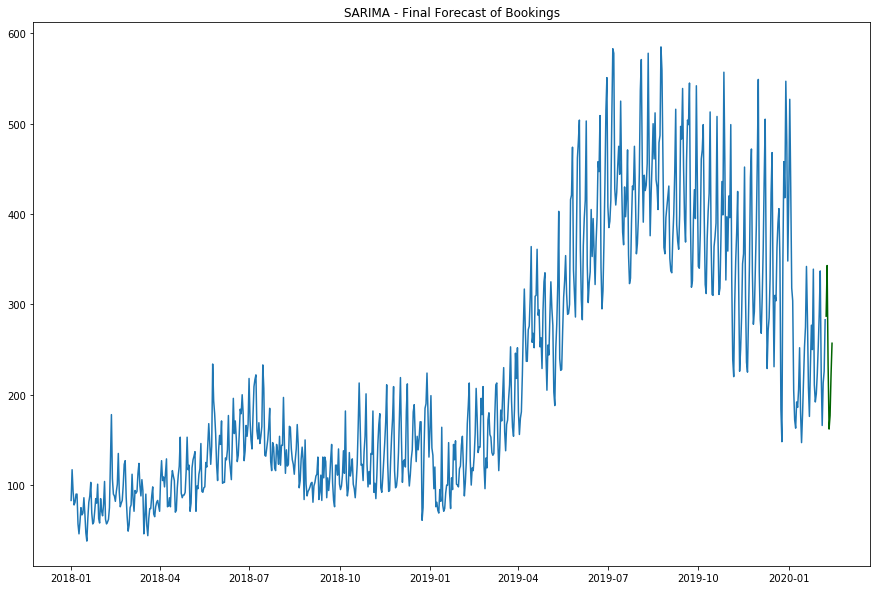

In [112]:
# Plot
plt.figure(figsize=(15,10))
plt.plot(df.bookings)
plt.plot(y_forecasted, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Bookings")
plt.show()

# SARIMAX

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [40]:
dataset= pd.read_csv('master_daily_export2_drop_last.csv', parse_dates=['date'],encoding = 'unicode_escape')

In [41]:
dataset.head(2)

,date,bookings,bagdays,commission
0,2020-02-07,283.0,594.0,1414.0
1,2020-02-06,226.0,529.0,1234.0


In [42]:
dataset.info()
dataset=dataset.drop(['commission'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
date          768 non-null datetime64[ns]
bookings      768 non-null float64
bagdays       768 non-null float64
commission    768 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 24.1 KB


In [43]:
dataset_for_prediction= dataset.copy()
dataset_for_prediction.head()
dataset_for_prediction.index= dataset_for_prediction['date']
dataset_for_prediction = dataset_for_prediction.sort_index()

Since the variables are on different scale, we need to normalize the data. We use MinMaxScaler, it will scale the data to a fixed range between 0 to 1.

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['bagdays']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [45]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['bookings']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [46]:
X.rename(columns={0:'bagdays'}, inplace=True)
X.index= dataset_for_prediction.index

In [47]:
X.head(2)

,bagdays
date,
2018-01-01,0.111828
2018-01-02,0.162724


In [48]:
y.rename(columns={0:'bookings'}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,bookings
date,
2018-01-01,0.082267
2018-01-02,0.144424


In [49]:
train_size=int(len(dataset) *0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

We know that Time series data is composed of Level, Trend, Seasonality and Random noise. Let’s decompose the data and plot the trend, seasonality and randomness in the data.
We use statsmodel for seasonal decompose as an additive model and the frequency of the time series which is the periodicity of the data which is 7 days.

In [ ]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['bagdays'],model= 'add',freq=7);
fig=seas_d.plot()
fig.set_figheight(10)
plt.show()

Now, let's check the stationarity of the data using ADF testing.

In [51]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [52]:
y_test=y['bookings'][:train_size].dropna()
test_adf(y_test, " bookings")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  bookings


In [53]:
test_adf(y_test.diff(), "bookings")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary bookings


## Building Model

We will use pyramid auto arima to perform a step wise search for AR and MA term that gives the lowest value of AIC.

In [54]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-2358.590, BIC=-2337.170, Fit time=0.501 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-2114.637, BIC=-2101.784, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-2216.214, BIC=-2199.077, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-2357.728, BIC=-2340.591, Fit time=0.437 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-2116.620, BIC=-2108.052, Fit time=0.199 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-2356.989, BIC=-2331.284, Fit time=0.677 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-2355.101, BIC=-2329.396, Fit time=0.379 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-2358.026, BIC=-2336.605, Fit time=0.517 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-2242.645, BIC=-2221.224, Fit time=0.252 seconds
Fit ARIMA: order=(2

In [55]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  537
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1184.295
Date:                Tue, 18 Feb 2020   AIC                          -2358.590
Time:                        15:33:42   BIC                          -2337.170
Sample:                    01-01-2018   HQIC                         -2350.210
                         - 06-21-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.033e-05      0.000     -0.189      0.850      -0.000       0.000
bagdays        1.0045      0.019     53.788      0.000       0.968       1.041
ar.L1          0.0923      0.052      1.773      0.076      -0.010       0.194
ma.L1         -0.8778      0.023    -38.447      0.000      -0.923      -0.833
sigma2         0.0007   3.47e-05     20.296      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      205.19   Jarque-Bera (JB):                57.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# The AIC is extremely lower than for any other model.

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=(0,1,1),
 enforce_invertibility=False, enforce_stationarity=False)

C:\Users\dyada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [58]:
results= model.fit()

In [59]:
predictions= results.predict(start =train_size, end=train_size + test_size -1 ,exog=test_X)

In [60]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [61]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['bookings']
predictions.rename(columns={0:'Pred'}, inplace=True)

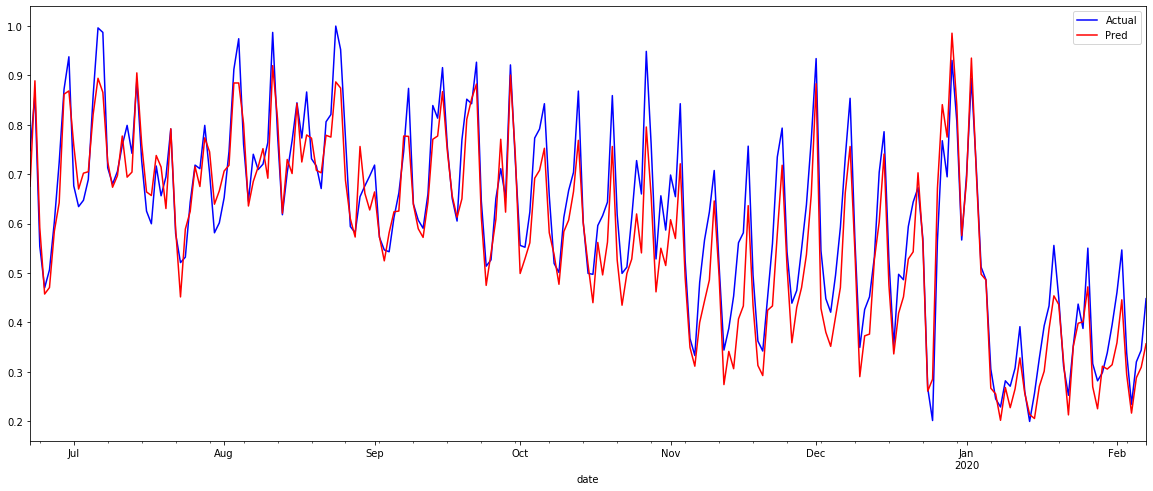

In [62]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color="red", figsize=(20,8))

In [63]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

0.06383922098264272

In [64]:
# We can see from the model we the RMSE is the lowest from all of the models. The smallest we had was 29.57 , while this one is 
# is cosiderably lower. 

# LSTM

In [3]:
import warnings
warnings.filterwarnings('ignore')

# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import CuDNNLSTM, LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_lstm.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = df.bookings
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='elu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='elu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
hist = model.fit(X, y, epochs=1000, verbose=1, callbacks=[es, mc])

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1000
748/748 [==============================] - 3s 4ms/step - loss: 41687.7336

Epoch 00001: loss improved from inf to 41687.73358, saving model to best_lstm.h5
Epoch 2/1000
748/748 [==============================] - 1s 1ms/step - loss: 16968.3865

Epoch 00002: loss improved from 41687.73358 to 16968.38653, saving model to best_lstm.h5
Epoch 3/1000
748/748 [==============================] - 1s 1ms/step - loss: 11573.5803

Epoch 00003: loss improved from 16968.38653 to 11573.58028, saving model to best_lstm.h5
Epoch 4/1000
748/748 [==============================] - 1s 1ms/step - loss: 16404.6722A: 0s - loss: 16266.21

Epoch 00004: loss did not improve from 11573.58028
Epoch 5/1000
748/748 [==============================] - 1s 1ms/step - loss: 10171.7370

Epoch 00005: loss improved from 11573.58028 to 10171.73701, saving model to best_lstm.h5
Epoch 6/1000
748/748 [=================

748/748 [==============================] - 1s 1ms/step - loss: 2711.6759

Epoch 00045: loss improved from 2835.48253 to 2711.67590, saving model to best_lstm.h5
Epoch 46/1000
748/748 [==============================] - 1s 1ms/step - loss: 2641.0063

Epoch 00046: loss improved from 2711.67590 to 2641.00626, saving model to best_lstm.h5
Epoch 47/1000
748/748 [==============================] - 1s 1ms/step - loss: 2836.8929

Epoch 00047: loss did not improve from 2641.00626
Epoch 48/1000
748/748 [==============================] - 1s 1ms/step - loss: 2681.0392

Epoch 00048: loss did not improve from 2641.00626
Epoch 49/1000
748/748 [==============================] - 1s 1ms/step - loss: 2682.6570

Epoch 00049: loss did not improve from 2641.00626
Epoch 50/1000
748/748 [==============================] - 1s 996us/step - loss: 2555.5693

Epoch 00050: loss improved from 2641.00626 to 2555.56930, saving model to best_lstm.h5
Epoch 51/1000
748/748 [==============================] - 1s 1ms/step - lo

748/748 [==============================] - 1s 999us/step - loss: 1972.8650

Epoch 00100: loss did not improve from 1799.13569
Epoch 101/1000
748/748 [==============================] - 1s 1ms/step - loss: 1902.6986

Epoch 00101: loss did not improve from 1799.13569
Epoch 102/1000
748/748 [==============================] - 1s 1ms/step - loss: 1850.8822

Epoch 00102: loss did not improve from 1799.13569
Epoch 103/1000
748/748 [==============================] - 1s 1ms/step - loss: 1824.8613

Epoch 00103: loss did not improve from 1799.13569
Epoch 104/1000
748/748 [==============================] - 1s 1ms/step - loss: 1911.0306

Epoch 00104: loss did not improve from 1799.13569
Epoch 105/1000
748/748 [==============================] - 1s 1ms/step - loss: 1857.7572

Epoch 00105: loss did not improve from 1799.13569
Epoch 106/1000
748/748 [==============================] - 1s 1ms/step - loss: 1947.4194

Epoch 00106: loss did not improve from 1799.13569
Epoch 107/1000
748/748 [================

748/748 [==============================] - 1s 1ms/step - loss: 1496.2260

Epoch 00156: loss did not improve from 1467.40042
Epoch 157/1000
748/748 [==============================] - 1s 1ms/step - loss: 1420.9153

Epoch 00157: loss improved from 1467.40042 to 1420.91525, saving model to best_lstm.h5
Epoch 158/1000
748/748 [==============================] - 1s 1ms/step - loss: 1385.4536

Epoch 00158: loss improved from 1420.91525 to 1385.45355, saving model to best_lstm.h5
Epoch 159/1000
748/748 [==============================] - 1s 1ms/step - loss: 1503.0763

Epoch 00159: loss did not improve from 1385.45355
Epoch 160/1000
748/748 [==============================] - 1s 1ms/step - loss: 1388.9766

Epoch 00160: loss did not improve from 1385.45355
Epoch 161/1000
748/748 [==============================] - 1s 1ms/step - loss: 1375.6071

Epoch 00161: loss improved from 1385.45355 to 1375.60708, saving model to best_lstm.h5
Epoch 162/1000
748/748 [==============================] - 1s 1ms/step 

748/748 [==============================] - 1s 1ms/step - loss: 1115.0270

Epoch 00268: loss did not improve from 1042.44548
Epoch 269/1000
748/748 [==============================] - 1s 1ms/step - loss: 1117.6633

Epoch 00269: loss did not improve from 1042.44548
Epoch 270/1000
748/748 [==============================] - 1s 1ms/step - loss: 1115.4839

Epoch 00270: loss did not improve from 1042.44548
Epoch 271/1000
748/748 [==============================] - 1s 1ms/step - loss: 1021.6168

Epoch 00271: loss improved from 1042.44548 to 1021.61681, saving model to best_lstm.h5
Epoch 272/1000
748/748 [==============================] - 1s 1ms/step - loss: 1065.0447

Epoch 00272: loss did not improve from 1021.61681
Epoch 273/1000
748/748 [==============================] - 1s 1ms/step - loss: 1087.4206

Epoch 00273: loss did not improve from 1021.61681
Epoch 274/1000
748/748 [==============================] - 1s 1ms/step - loss: 1221.5981

Epoch 00274: loss did not improve from 1021.61681
Epoch

In [4]:
# model.save('best_lstm_mse_1021.h5')

In [117]:
# demonstrate prediction
x_input = array(df.bookings[-14:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[297.76355 328.32462 252.8036  196.62173 200.55228 262.98932 258.2623 ]]


In [119]:
preds_lstm = pd.DataFrame(yhat.astype('int').reshape(7,1),columns=['bookings'],index=pd.date_range(df.bookings.index[-1]  + pd.DateOffset(1),df.bookings.index[-1]  + pd.DateOffset(7)))
preds_lstm

,bookings
2020-02-08,297
2020-02-09,328
2020-02-10,252
2020-02-11,196
2020-02-12,200
2020-02-13,262
2020-02-14,258


In [124]:
y_forecasted

2020-02-08    287
2020-02-09    343
2020-02-10    233
2020-02-11    162
2020-02-12    177
2020-02-13    222
2020-02-14    257
Freq: D, dtype: int32

## DATA LIMITATIONS

1. The duration of the data provided is considerably short for prediction purposes. The models do not have enough training size to pick up the trend and be able to predict when faced with new data. ARIMA results would eventually revert to mean, while SARIMA exhibits better performance, as it picks up seasonality in the data.

2. Including other characteristics improve the model immensely, however, the data should be available for the prediction day. For a considerable amount of data SARIMAX model can recognize pattern/algorithm and predict based on that.

3. For LSTM model we need more data so when more data is available and we can train on it to get better results.

# Important models need to be retrained from time to time to be useful!!!